In [2]:
%matplotlib inline
import sympy 
import numpy as np
import matplotlib.pyplot as plt 
import ipywidgets

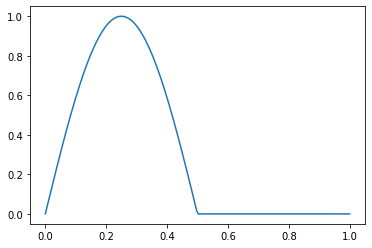

In [4]:
#Zdefiniuj wektor zawierający próbki jednego okresu badanej funkcji
import sympy 
import numpy as np
import matplotlib.pyplot as plt 

#declare symbolic variable t (time) and period (T=1)
t = sympy.Symbol('t', real = 'True', nonzero = 'True') 
T = 1

#declare functions (fA, fB, ... fF)
fA = sympy.Piecewise((2*t/T, t <= T/2), (1 - 2*t/T, t > T/2))
fB = 1 - 2*t/T
fC = sympy.Piecewise((2*t/T, t <=T/2),(-2*t/T + 2, t > T/2))
fD = sympy.Piecewise((1, t <= T/4), (0, (t > T/4) & (t < 3*T/4)), (1, t >= 3*T/4))
fE = sympy.Piecewise((sympy.sin(2*sympy.pi*t/T), t <= T/2), (0, t > T/2))
fF = sympy.exp(-1 * t)

#select one function
currFun = fE

#plot the selected function
NumberOfSamples = 200
Functor = sympy.lambdify(t, currFun, 'numpy')
Time = np.linspace(0, T, NumberOfSamples)
Samples = Functor(Time)
plt.plot(Time, Samples, )

In [5]:
#Na podstawie wyznaczonych wzorów funkcji znajdź rozwinięcie funkcji w szereg Fouriera.

#declare symbolic variable k
k = sympy.Symbol('k', real = 'True', nonzero=True, positive=True, integer=True)

def determineFourierCoefficients(Function, RangeBeg, RangeEnd, DisplayCoeffs=True):

    #declare Kernel
    Kernel = sympy.exp((-sympy.I*k*2*sympy.pi/T)*t)

    #determine F0
    F0 = (1/T) * sympy.integrate(Function, (t,RangeBeg,RangeEnd))

    print("F0"); display(F0)

    #determine Fk
    Fk = (1/T) * sympy.integrate(Function*Kernel, (t, RangeBeg, RangeEnd))
    print("Fk"); display(Fk)
    print("Fk uproszczony = "); display(Fk.simplify())


    return F0, Fk

F0, Fk = determineFourierCoefficients(currFun, 0, T)


F0


1.0/pi

Fk


1.0*Piecewise((1/(-2*pi*k**2*exp(1.0*I*pi*k) + 2*pi*exp(1.0*I*pi*k)) + 1/(-2*pi*k**2 + 2*pi), Ne(k, 1)), (1/(4*pi) + 0.25*I*exp(-1.0*I*pi) + exp(-1.0*I*pi)/(4*pi), True))

Fk uproszczony = 


Piecewise((-0.5*((-1)**k + 1)/(pi*(k**2 - 1)), Ne(k, 1)), (-0.25*I, True))

In [6]:
#Wyznaczanie wartości pierwszych 10 współczynników szeregu Fouriera

#create array containing calculated coefficients
arr = []
arr.append(np.cdouble(F0))

for i in range(1,10):
    arr.append(np.cdouble(Fk.simplify().subs(k,i)))

num = 0
#print array content
for i in arr:
    print(f"F{num} = {i.round(10)}")
    num += 1


F0 = (0.3183098862+0j)
F1 = -0.25j
F2 = (-0.1061032954+0j)
F3 = 0j
F4 = (-0.0212206591+0j)
F5 = 0j
F6 = (-0.0090945682+0j)
F7 = 0j
F8 = (-0.0050525379+0j)
F9 = 0j
